## Notebook to generate synthetic data for clustering experiment
we will do experiment on:

1. High dimensional gaussian balls (synthetic dataset generated by sampling from hyper gaussian ball)
2. Combinations of dimension number and various types of distribution, mixed distribution. (this is to test applicablity on non-Gaussian dist)
3. Real use case dataset: UCI cloud data. (to test generalization to real life use cases)

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import random
from random import gauss

### Type 1 dataset: synthetic from gaussian distributions

In [54]:
#type 1: synthetic Gaussian Balls Distribution
def gaussian_ball_sampler(num_points,features,clusters_count,std_range):
    '''
    std_range is a given range to generate random std for each feature
    num_points is total number of data rows to generate, features is number of features to generate
    '''
    # Make features and targets with number of samples
    std_list = []
    
    for i in range(clusters_count):
        rand_std = gauss(std_range[0],std_range[1])
        std_list.append(rand_std)
    
    features, target = make_blobs(n_samples = num_points,
                      n_features = features,
                      centers = clusters_count,
                      cluster_std = std_list,
                      shuffle = True)
    
    gaussian_balls = pd.DataFrame(data=features)
    columns_count = gaussian_balls.shape[1]
    cols = []
    #create column names
    for col in range(columns_count):
        str_col_nm = 'gaussian_col_%s'%col
        cols.append(str_col_nm)

    gaussian_balls.columns = cols

    return gaussian_balls,target

In [55]:
#to sample from gaussian balls
num_points = 2000
features = 15
clusters_count = 5
std_range = [2,0.5]

In [56]:
gaussian_table,label = gaussian_ball_sampler(num_points,features,clusters_count,std_range)

In [57]:
gaussian_table.head()

,gaussian_col_0,gaussian_col_1,gaussian_col_2,gaussian_col_3,gaussian_col_4,gaussian_col_5,gaussian_col_6,gaussian_col_7,gaussian_col_8,gaussian_col_9,gaussian_col_10,gaussian_col_11,gaussian_col_12,gaussian_col_13,gaussian_col_14
0,-4.791373,1.993732,8.869579,4.171706,-9.874671,-6.183162,-4.575149,9.857655,4.266814,-2.990633,-4.813392,-6.959809,3.815385,1.938533,3.081719
1,-8.622175,-3.204819,2.837300,0.710140,3.712468,-3.486181,-4.883542,-7.883172,2.337406,-5.949252,-8.370480,8.691864,-4.630819,-11.558010,-0.118482
2,-7.476018,-1.201805,-10.440195,7.858260,-11.398346,7.240623,-4.191895,-4.724641,-3.283362,9.961735,-7.709247,-12.842442,4.581387,2.849724,-7.130747
3,-9.937863,-5.602554,2.127672,-0.157839,2.759026,-2.859872,-6.078538,-6.654027,0.936975,-5.717643,-9.095442,6.296585,-6.766659,-7.961864,-2.560192
4,-7.707648,-3.058473,-4.001920,3.797605,-7.591345,4.415435,4.139896,-4.122959,-3.116810,9.414098,-4.876997,-6.360155,-0.112726,1.607961,-3.870861


### Type 2 dataset: some synthetic gaussian, some synthetic gamma, mixed data

In [58]:
#first part: sampled from Gaussian
#to sample from gaussian balls
num_points = 2000
gaussian_features = 10
clusters_count = 5
std_range = [2,0.5]
#to sample from gamma distribution
shape,scale = 3,10
num_gamma_cols = 3

In [40]:
#second part: sampled from Gamma
def gamma_sampler(shape,scale,num_samples):
    '''
    generate ndarray sampled from gamma distribution, one column at each call
    '''
    data_array = np.random.gamma(shape, scale, num_samples)
    count, bins, ignored = plt.hist(data_array, 50, density=True)
    return data_array

In [71]:
def mixed_data_maker(num_gamma_cols):
    #gaussian part:
    #using global vars to get pd df
    gaussian_table,label = gaussian_ball_sampler(num_points,features,clusters_count,std_range)
    print('gamma cols need normalization to align with gaussian columns')
    for i in range(num_gamma_cols):
        print('creating gamma col %d'%i)
        gamma_col = gamma_sampler(shape,scale,num_points)
        gaussian_table['gamma_col_%s'%i] = pd.Series(gamma_col)
    print('final mixed table shape:',gaussian_table.shape)
    return gaussian_table

gamma cols need normalization to align with gaussian columns
creating gamma col 0
creating gamma col 1
final mixed table shape: (2000, 12)


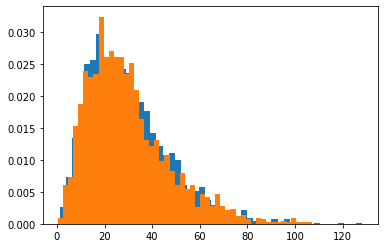

In [75]:
mixed_dataset = mixed_data_maker(2)

### Type 3 dataset: Real use cases dataset for clustering: UCI cloud

In [77]:
#UCI cloud dataset, with 10 dimensions
import csv
with open('cloud.data') as input_file:
    lines = input_file.readlines()
    newLines = []
    
    for line in lines:
        list_line = line.strip().split(" ")
        while("" in list_line) : 
            list_line.remove("")
        num_list = [float(a) for a in list_line]
        newLines.append(num_list)
        
UCI_cloud = pd.DataFrame.from_records(newLines)
columns_count = UCI_cloud.shape[1]

cols = []
#create column names
for col in range(columns_count):
    str_col_nm = 'attr_%s'%col
    cols.append(str_col_nm)

UCI_cloud.columns = cols
#UCI_cloud.to_csv("UCI_cloud.csv")

In [78]:
UCI_cloud.head()

,attr_0,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9
0,3.0,140.0,43.5000,0.0833,862.8417,0.0254,3.8890,163.0,240.0,213.3555
1,3.0,135.0,41.9063,0.0790,690.3291,0.0259,3.8340,167.0,239.0,213.7188
2,2.0,126.0,21.0586,0.0406,308.3583,0.0684,3.1702,174.0,240.0,227.5859
3,4.0,197.0,77.4805,0.0890,874.4709,0.0243,3.9442,155.0,239.0,197.2773
4,7.0,193.0,88.8398,0.0884,810.1126,0.0223,3.9318,150.0,236.0,186.0195
